# Indexing pandas time series

### Indexing time series

In [1]:
import pandas as pd

filepath = 'csv_files/aapl.csv'

df_aapl = pd.read_csv(filepath, index_col='Date', parse_dates=True, usecols=['Open', 'High', 'Low', 'Date'])

df_aapl.head()

,Open,High,Low
Date,,,
2008-10-14,116.26,116.40,103.14
2008-10-13,104.55,110.53,101.02
2008-10-10,85.70,100.00,85.00
2008-10-09,93.35,95.80,86.60
2008-10-08,85.91,96.33,85.68


In [31]:
df_aapl.info() # we have DatetimeIndex in the index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 318 entries, 2008-10-14 to 2007-07-13
Data columns (total 3 columns):
Open    318 non-null float64
High    318 non-null float64
Low     318 non-null float64
dtypes: float64(3)
memory usage: 9.9 KB


### Selecting data by date

In [35]:
df_aapl.loc['2008-10-08', 'Open'] # specific day

Date
2008-10-08    85.91
Name: Open, dtype: float64

In [40]:
df_aapl.loc['2008-7', 'Open'] # by month

Date
2008-07-31    157.54
2008-07-30    157.78
2008-07-29    155.41
2008-07-28    162.34
2008-07-25    160.40
2008-07-24    164.32
2008-07-23    164.99
2008-07-22    149.00
2008-07-21    166.90
2008-07-18    168.52
2008-07-17    174.10
2008-07-16    170.20
2008-07-15    172.48
2008-07-14    179.24
2008-07-11    175.47
2008-07-10    174.92
2008-07-09    180.20
2008-07-08    175.40
2008-07-07    173.16
2008-07-03    169.59
2008-07-02    175.20
2008-07-01    164.23
Name: Open, dtype: float64

Selecting as a range

In [42]:
df_aapl.loc['2008' : '2007', 'Open']

Date
2008-10-14    116.26
2008-10-13    104.55
2008-10-10     85.70
2008-10-09     93.35
2008-10-08     85.91
2008-10-07    100.48
2008-10-06     91.96
2008-10-03    104.00
2008-10-02    108.01
2008-10-01    111.92
2008-09-30    108.25
2008-09-29    119.62
2008-09-26    124.91
2008-09-25    129.80
2008-09-24    127.27
2008-09-23    131.85
2008-09-22    139.94
2008-09-19    142.60
2008-09-18    130.57
2008-09-17    138.49
2008-09-16    133.86
2008-09-15    142.03
2008-09-12    150.91
2008-09-11    148.18
2008-09-10    152.32
2008-09-09    156.86
2008-09-08    164.57
2008-09-05    158.59
2008-09-04    165.86
2008-09-03    166.84
               ...  
2007-08-23    133.09
2007-08-22    131.22
2007-08-21    122.21
2007-08-20    123.96
2007-08-17    122.01
2007-08-16    117.01
2007-08-15    122.74
2007-08-14    128.29
2007-08-13    128.32
2007-08-10    123.12
2007-08-09    131.11
2007-08-08    136.76
2007-08-07    134.94
2007-08-06    132.90
2007-08-03    135.26
2007-08-02    136.65
2007-08-

### Converting strings to datetime

In [44]:
evening_2_11 = pd.to_datetime(['2015-11-08 12:30:00', '2018-07-08 13:45:30'])

evening_2_11

DatetimeIndex(['2015-11-08 12:30:00', '2018-07-08 13:45:30'], dtype='datetime64[ns]', freq=None)

### Reindexing DataFrame

In [45]:
df_aapl.head(2)

,Open,High,Low
Date,,,
2008-10-14,116.26,116.40,103.14
2008-10-13,104.55,110.53,101.02


In [46]:
evening_2_11

DatetimeIndex(['2015-11-08 12:30:00', '2018-07-08 13:45:30'], dtype='datetime64[ns]', freq=None)

In [49]:
df_aapl.reindex(evening_2_11)

,Open,High,Low
2015-11-08 12:30:00,NaN,NaN,NaN
2018-07-08 13:45:30,NaN,NaN,NaN


## Resapmling pandas time series

Resampling - e.g. resampling data from daily to weekly (downsampling)

### Aggregating means

For example, we can get a weekly average open price resampling data weekly and taking a mean value from them.

In [56]:
df_aapl_shorter = df_aapl.loc['2008-08': '2008-07', 'Open']

daily_mean = df_aapl_shorter.resample('D').mean() # 'D' stands for daily, 'W' for weekly

daily_mean

Date
2008-07-01    164.23
2008-07-02    175.20
2008-07-03    169.59
2008-07-04       NaN
2008-07-05       NaN
2008-07-06       NaN
2008-07-07    173.16
2008-07-08    175.40
2008-07-09    180.20
2008-07-10    174.92
2008-07-11    175.47
2008-07-12       NaN
2008-07-13       NaN
2008-07-14    179.24
2008-07-15    172.48
2008-07-16    170.20
2008-07-17    174.10
2008-07-18    168.52
2008-07-19       NaN
2008-07-20       NaN
2008-07-21    166.90
2008-07-22    149.00
2008-07-23    164.99
2008-07-24    164.32
2008-07-25    160.40
2008-07-26       NaN
2008-07-27       NaN
2008-07-28    162.34
2008-07-29    155.41
2008-07-30    157.78
2008-07-31    157.54
2008-08-01    159.90
2008-08-02       NaN
2008-08-03       NaN
2008-08-04    156.60
2008-08-05    155.42
2008-08-06    159.97
2008-08-07    162.71
2008-08-08    163.86
2008-08-09       NaN
2008-08-10       NaN
2008-08-11    170.07
2008-08-12    173.52
2008-08-13    177.98
2008-08-14    178.33
2008-08-15    179.04
2008-08-16       NaN
2008-08-

In [58]:
# daily mean for partiular day
print(daily_mean.loc['2008-08-22'])

175.82


Methods can be changed together:


In [67]:
weekly_sum = df_aapl_shorter.resample('W').sum()

weekly_max = df_aapl_shorter.resample('W').sum().max()

print(weekly_sum)
print(weekly_max)

Date
2008-07-06    509.02
2008-07-13    879.15
2008-07-20    864.54
2008-07-27    805.61
2008-08-03    792.97
2008-08-10    798.56
2008-08-17    878.94
2008-08-24    875.17
2008-08-31    870.46
Freq: W-SUN, Name: Open, dtype: float64
879.15


### Resampling strings

In [69]:
df_aapl_shorter.resample('2W').count() # 2 week intervals

Date
2008-07-06     3
2008-07-20    10
2008-08-03    10
2008-08-17    10
2008-08-31    10
Name: Open, dtype: int64

## Manipulating time series data

In [2]:
filepath = 'csv_files/aapl.csv'

aapl = pd.read_csv(filepath_or_buffer=filepath, parse_dates=['Date']) # parse_dates given in list to
        # inform read_csv() function to convert 'string' object into datetime objects.  

aapl.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


## String methods

In [3]:
file_path = 'csv_files/iris.csv'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

iris = pd.read_csv(file_path, names=col_names)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
iris.iloc[:10, 4].str.upper()

0    IRIS-SETOSA
1    IRIS-SETOSA
2    IRIS-SETOSA
3    IRIS-SETOSA
4    IRIS-SETOSA
5    IRIS-SETOSA
6    IRIS-SETOSA
7    IRIS-SETOSA
8    IRIS-SETOSA
9    IRIS-SETOSA
Name: species, dtype: object

### Substring matching

In [81]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [83]:
iris['species'].str.contains('is-v')

# in Python:
    # True = 1
    # False = 0

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
120     True
121     True
122     True
123     True
124     True
125     True
126     True
127     True
128     True
129     True
130     True
131     True
132     True
133     True
134     True
135     True
136     True
137     True
138     True
139     True
140     True
141     True
142     True
143     True
144     True
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In Python True = 1 and False = 0, this allows to count the number of True and False in the dataset

In [84]:
iris['species'].str.contains('is-v').sum()

100

## Datetime methods

In [98]:
hours = aapl['Date'].dt.hour

hours.head()

0    0
1    0
2    0
3    0
4    0
Name: Date, dtype: int64

## Visualizing pandas time series

In [117]:
import matplotlib.pyplot as plt

path_to_file = '/home/ilves/Documents/Python_Learning/jupyter_files/csv_files/aapl.csv'

df_aapl_vis = pd.read_csv(filepath, index_col='Date', parse_dates=True)

df_aapl_vis.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


Deufalt plot

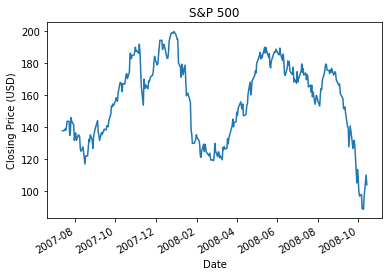

In [119]:
df_aapl_vis['Close'].plot(title='S&P 500')

plt.ylabel('Closing Price (USD)')

plt.show()

Specifying the range

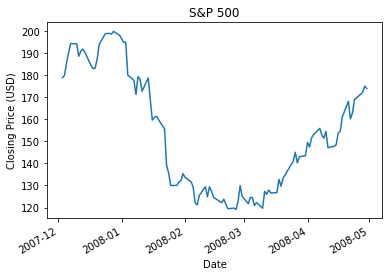

In [122]:
df_aapl_vis.loc['2008-04': '2007-12', 'Close'].plot(title='S&P 500')

plt.ylabel('Closing Price (USD)')

plt.show()

Plotting styles

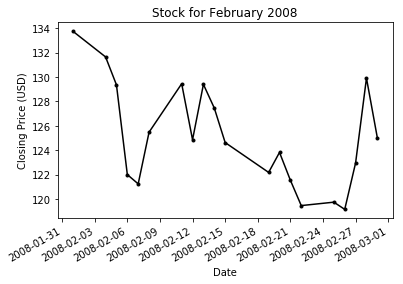

In [126]:
df_aapl_vis.loc['2008-02', 'Close'].plot(title='Stock for February 2008', style='k.-')

plt.ylabel('Closing Price (USD)')

plt.show()

Style format string consists of 3 characters: e.g. ('k.-)
	1st is color (k: black)
	2nd is marker (. : dot)
	3rd is line stule (- solid)

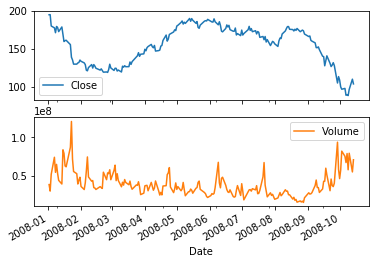

In [128]:
df_aapl_vis.loc['2008', ['Close', 'Volume']].plot(subplots=True)

plt.show()